In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Veggies_DL/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Veggies_DL/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

##Building Convulution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.5))  #to avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,121,316 (8.09 MB)

 Trainable params: 2,121,316 (8.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.0306 - loss: 54.8136 - val_accuracy: 0.1567 - val_loss: 3.4161
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.0967 - loss: 3.4073 - val_accuracy: 0.2792 - val_loss: 3.0198
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.1688 - loss: 3.1624 - val_accuracy: 0.3732 - val_loss: 2.6559
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.2433 - loss: 2.8589 - val_accuracy: 0.4786 - val_loss: 2.1506
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.3241 - loss: 2.5914 - val_accuracy: 0.5356 - val_loss: 1.9925
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.3725 - loss: 2.3579 - val_accuracy: 0.6154 - val_loss: 1.6678
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.4323 - loss: 2.1219 - val_accuracy: 0.6724 - val_loss: 1.6986
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.4743 - loss: 1.9467 - val_accuracy: 0.6524 - 

##Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 76s 779ms/step - accuracy: 0.9481 - loss: 0.2404
Training accuracy: 0.9540930986404419


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9368 - loss: 0.5312
Validation accuracy: 0.9316239356994629


#Saving Model

In [ ]:
cnn.save('trained_model2.h5')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.041733548045158386,
  0.1062600314617157,
  0.18041732907295227,
  0.2468699812889099,
  0.32552167773246765,
  0.37945425510406494,
  0.4385232627391815,
  0.47929373383522034,
  0.5377206802368164,
  0.5739967823028564,
  0.6247190833091736,
  0.6340289115905762,
  0.6356340050697327,
  0.6786516904830933,
  0.7091493010520935,
  0.7338683605194092,
  0.7248796224594116,
  0.7467094659805298,
  0.7695024013519287,
  0.7781701683998108,
  0.766292154788971,
  0.7894061207771301,
  0.8009631037712097,
  0.7990369200706482,
  0.8269662857055664,
  0.8256821632385254,
  0.844622790813446,
  0.834991991519928,
  0.8426966071128845,
  0.8468700051307678],
 'loss': [17.923486709594727,
  3.3624765872955322,
  3.121290683746338,
  2.8318443298339844,
  2.5582997798919678,
  2.3165271282196045,
  2.084857225418091,
  1.9438501596450806,
  1.7288440465927124,
  1.5939964056015015,
  1.4073630571365356,
  1.364544153213501,
  1.3432590961456299,
  1.1563407182693481,
  1.0723021

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 93.16239356994629 %


#Accuracy Visualization

##Training Visualization

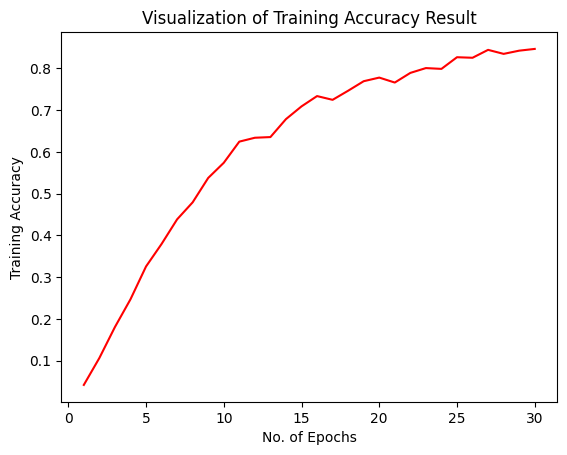

In [ ]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

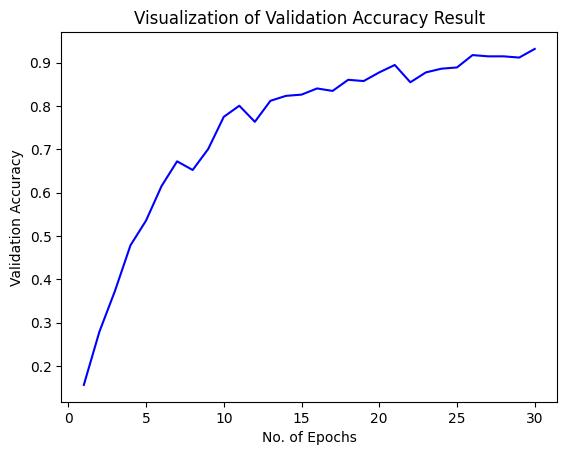

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test Set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Veggies_DL/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 107s 9s/step - accuracy: 0.9163 - loss: 0.6940
Test accuracy: 0.9303621053695679
